# Data Analysis in Python Using Uproot

Uproot is stricly an I/O library, meaning it only deals with inputting and outputting ROOT files. Consequently, while Uproot allows physicists to analyze ROOT files in Python, there is no access to any ROOT functions such as Draw() or Print() commands. Therfore, we must use NumPy and Matplotlib to analyze and output data.

### Dependencies

To install Uproot, NumPy, and Matplotlib, we can use pip. Simply run in your command prompt:

Now we can import the necessary libraries in your python program:

In [1]:
import uproot
import numpy as np
from matplotlib import pyplot as plt

Here, we use the standard designations of <code>np</code> and <code>plt</code> for NumPy and Matplotlib, respectively.

### Importing

To import a ROOT file into a Jupyter Notebook, we can use the <code>uproot.open()</code> function. For example:

In [2]:
f = uproot.open("hcal_gmn_fullreplay_13747_stream0_seg0_0.root")

Note, this code addresses a local ROOT file called "hcal_gmn_fullreplay_13747_stream0_seg0_0.root" that is located in the same directory as the Python program running in Jupyter Notebook. Throughout this tutorial, we use a ROOT file with data from an experiment ran in Hall A, using the hadronic calorimeter (HCal) to investigate the radius of the nucleons; you can download the root file <a href="https://hallaweb.jlab.org/users/camsonne/SULI/hcal_gmn_fullreplay_13747_stream0_seg0_0.root">here</a>. For more information about the particular experiment, please visit this <a href="https://indico.jlab.org/event/503/contributions/9343/attachments/7501/10444/GMn_talk_BW_2022.pdf">link</a>

We have assigned the variable <code>f</code> to be our ROOT file. From here, we can see the contents of <code>f</code> by calling the <code>.classnames()</code> method like so.

In [3]:
f.classnames()

{'Run_Data;1': 'THaRun', 'T;1': 'TTree', 'E;1': 'TTree', 'TSsbs;1': 'TTree'}

The elements of <code>f</code> can be accessed using brackets, similar to a dictionary in Python. To access the 'T' TTree in <code>f</code>, we can call

In [4]:
f["T"]

<TTree 'T' (821 branches) at 0x017cca3feb50>

However, we can circumvent this step by navigating straight to the 'T' TTree when opening our ROOT file like so

In [5]:
T = uproot.open("hcal_gmn_fullreplay_13747_stream0_seg0_0.root:T")

Now we see that the variable <code>T</code> maps to the TTree 'T'.

In [6]:
print(T)

<TTree 'T' (821 branches) at 0x017d25b1ee50>


### Reading Data

From the T branch, we can access the HCal data in the Super Super BigBite Spectrometer by running <code>T["sbs.hcal.key"]</code> where 'key' is one of the avabile variables in HCal. A complete list of variables and their descriptions can be found <a href="https://sbs.jlab.org/wiki/index.php/SBS_Replay_Variable_Names">here</a>, but several common ones associated with the HCal are a, e, x, and y.

Note if for example you wanted to access the energies of the largest clusters from the preshower module in the big byte spectrometer, you would write <code>T["bb.sh.e"]</code>

A numpy array of the largest energy clusters from the HCal is created by running the code below

In [7]:
e = np.array(T["sbs.hcal.e"].array())

#printing the array and its size
print(e)
print("size:", np.size(e))

[0.05336738 0.02067298 0.06964668 ... 0.07498247 0.04566595 0.15350575]
size: 31213


### Plotting Data

Now we can plot a histogram of e. Along the x axis is the energy in units of GeV and the y axis represents frenquency. 

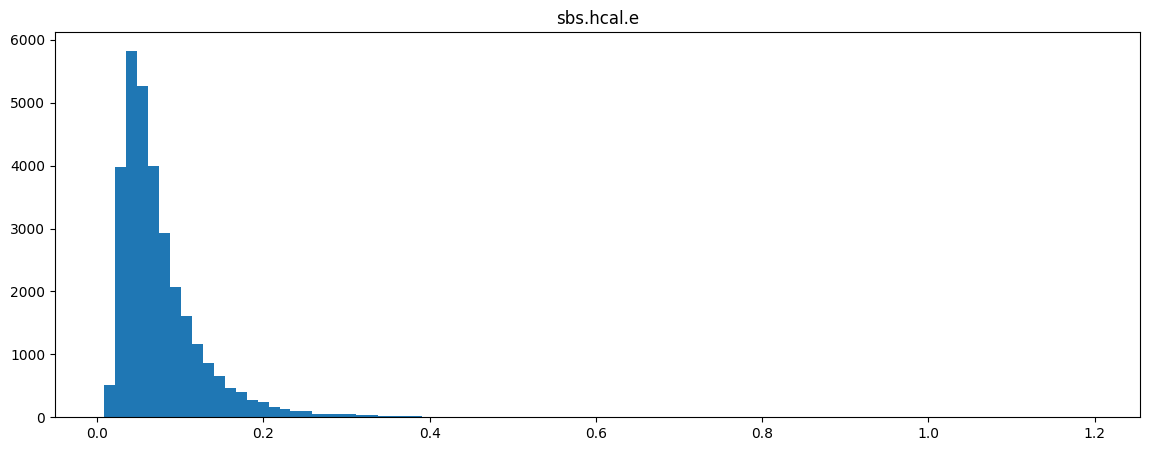

In [8]:
#Create figure
fig = plt.figure(figsize =(14, 5))
plt.hist(e, bins = 90)
 
# Show plot
plt.title("sbs.hcal.e")
plt.show()

We can also create a scatter plot to represent the x and y positions of the largest energy clusters.

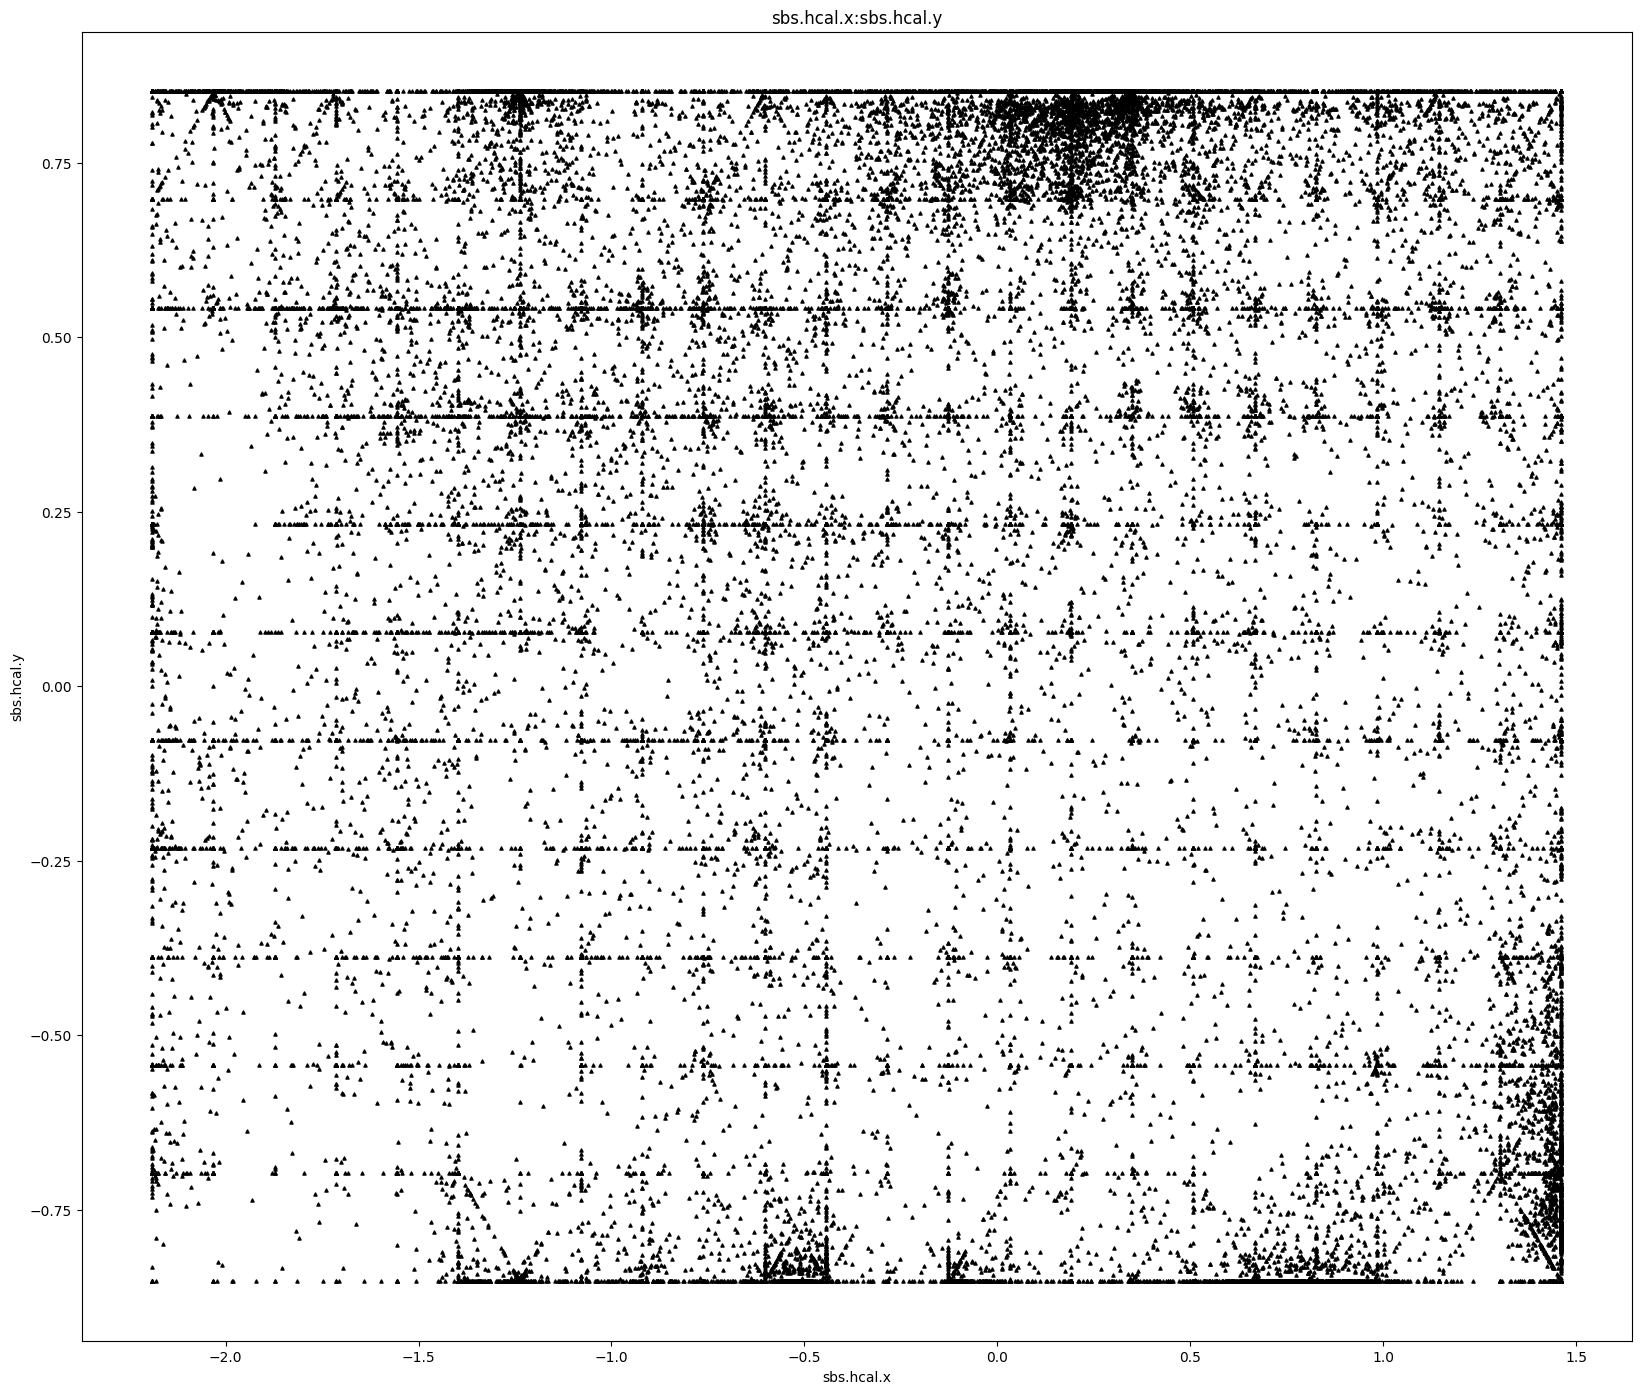

In [9]:
#Get cluster x and y data
x = np.array(T["sbs.hcal.x"].array()) 
y = np.array(T["sbs.hcal.y"].array())

#create figure
fig = plt.figure(figsize = (20, 17))
ax = plt.axes()
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')

#Create plot
sctt = ax.scatter(x, y, s=5, c="black", marker ='^') #(x, y, size, color, marker)


 
# show plot
plt.title("sbs.hcal.x:sbs.hcal.y")
plt.show()


Now we can combine the x, y position with the associated energy to create a 3d scatter plot. 

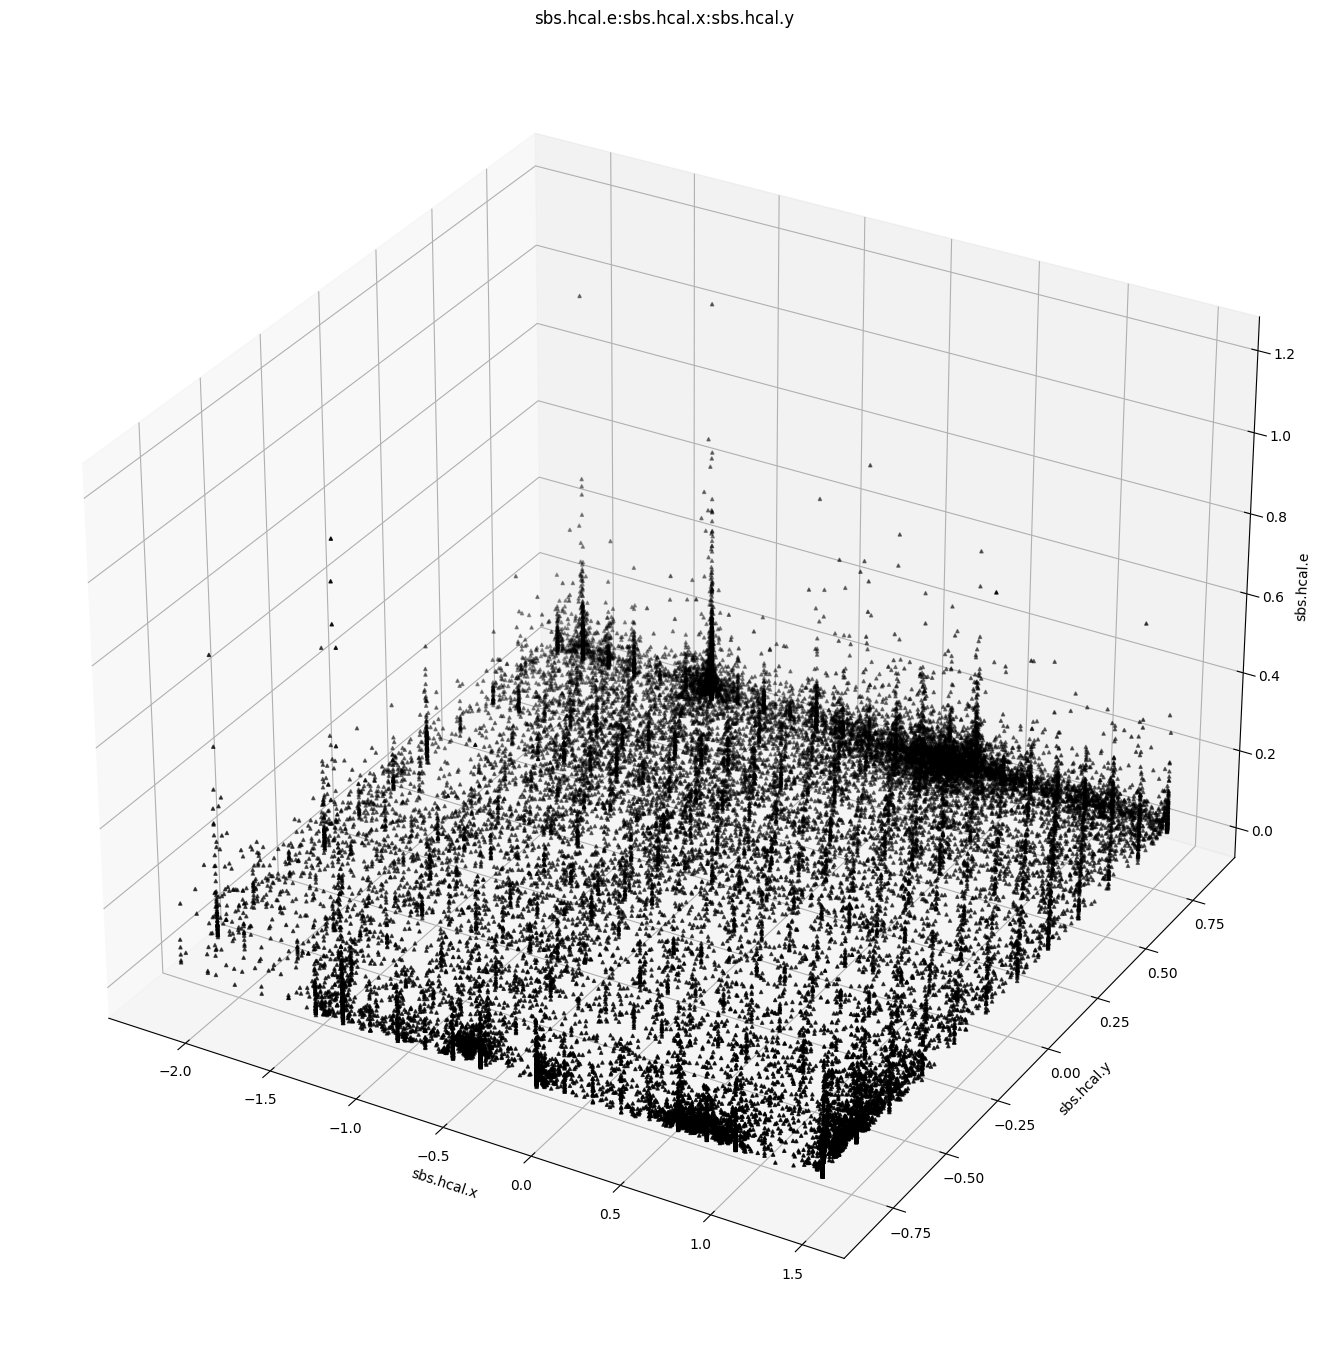

In [10]:
# Creating figure
fig = plt.figure(figsize = (20, 17))
ax = plt.axes(projection ="3d")
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')
ax.set_zlabel('sbs.hcal.e')

# Creating plot
ax.scatter3D(x, y, e, s=5, c = "black", marker ='^') #(x, y, z, size, color, marker)
plt.title("sbs.hcal.e:sbs.hcal.x:sbs.hcal.y")
 
# show plot
plt.show()

### Plotting in color

3d scatterplot with color based on energy

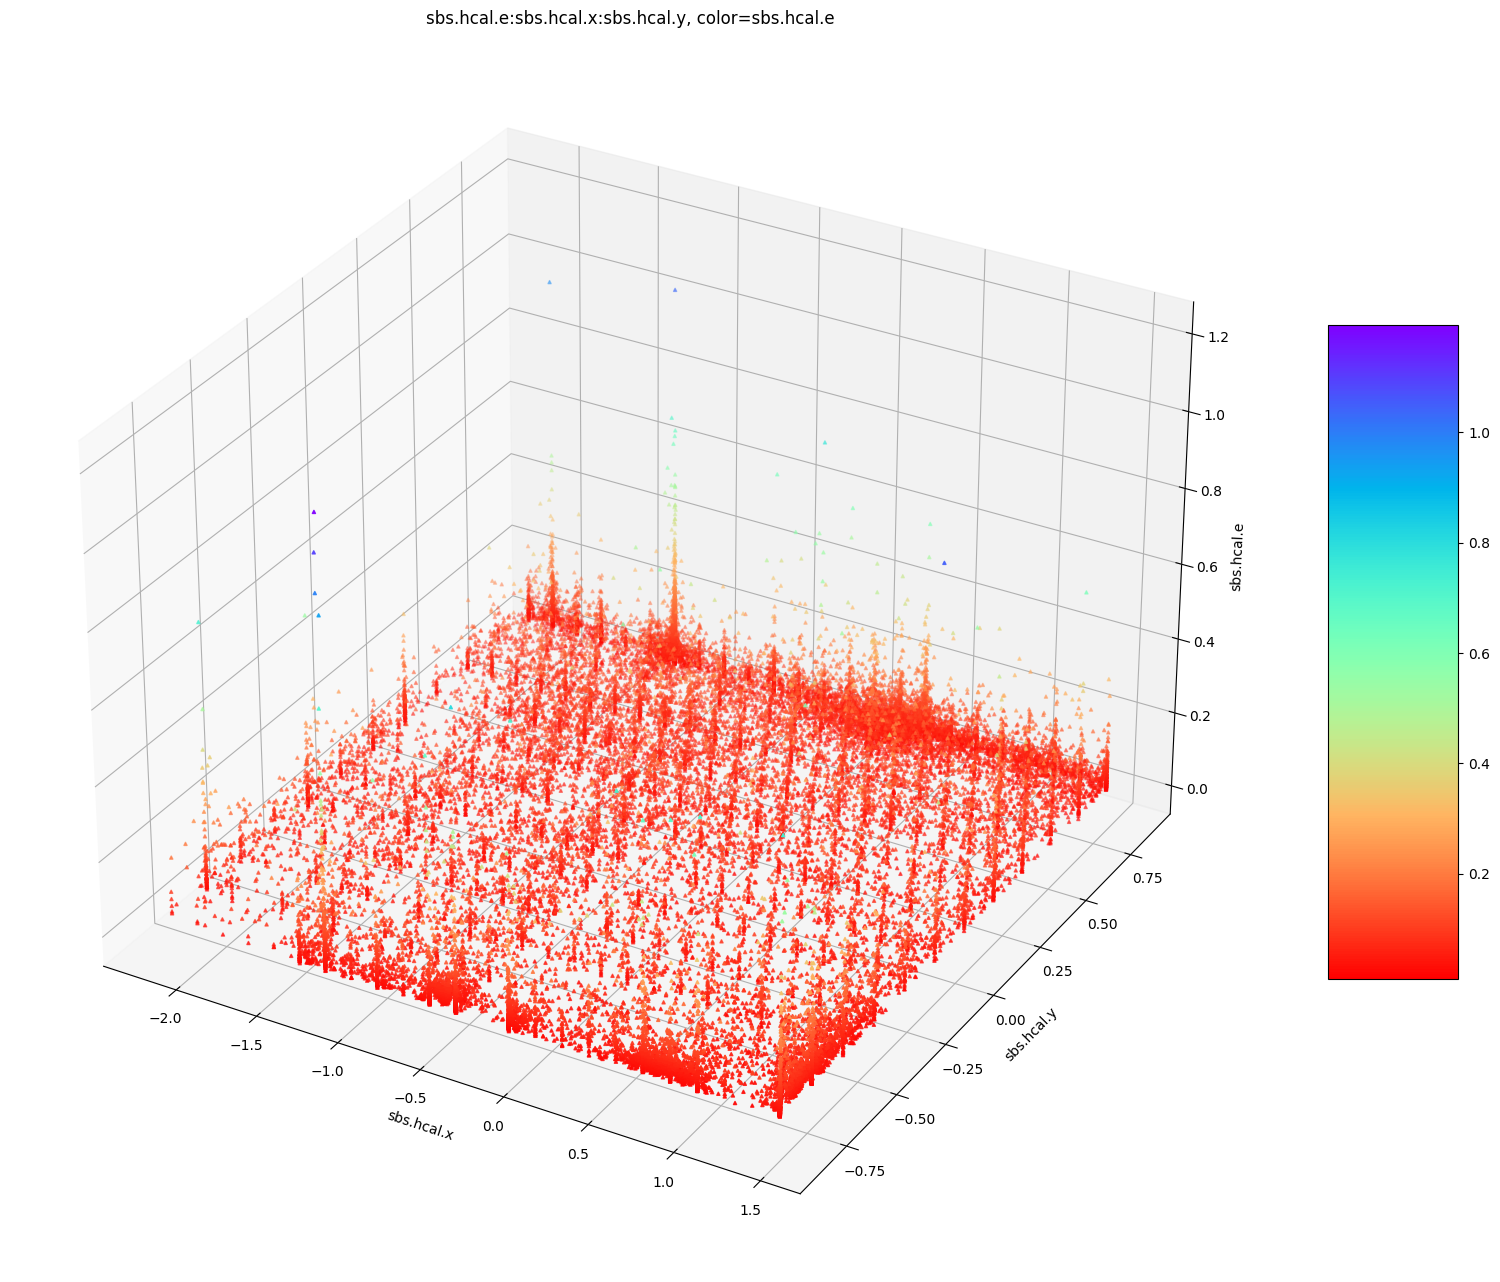

In [11]:
# Creating figure
fig = plt.figure(figsize = (20, 17))
ax = plt.axes(projection ="3d")
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')
ax.set_zlabel('sbs.hcal.e')

#colormap
my_cmap = plt.get_cmap('rainbow_r') 

# Creating plot
sctt = ax.scatter3D(x, y, e, c=e, s=5, cmap = my_cmap, marker ='^') #(x, y, z, color, size, colormap, marker)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)


plt.title("sbs.hcal.e:sbs.hcal.x:sbs.hcal.y, color=sbs.hcal.e")
 
# show plot
plt.show()

Rather than viewing energy on the z-axis, we can reduce to a 2d positional scatter plot with color to identify the energy. 

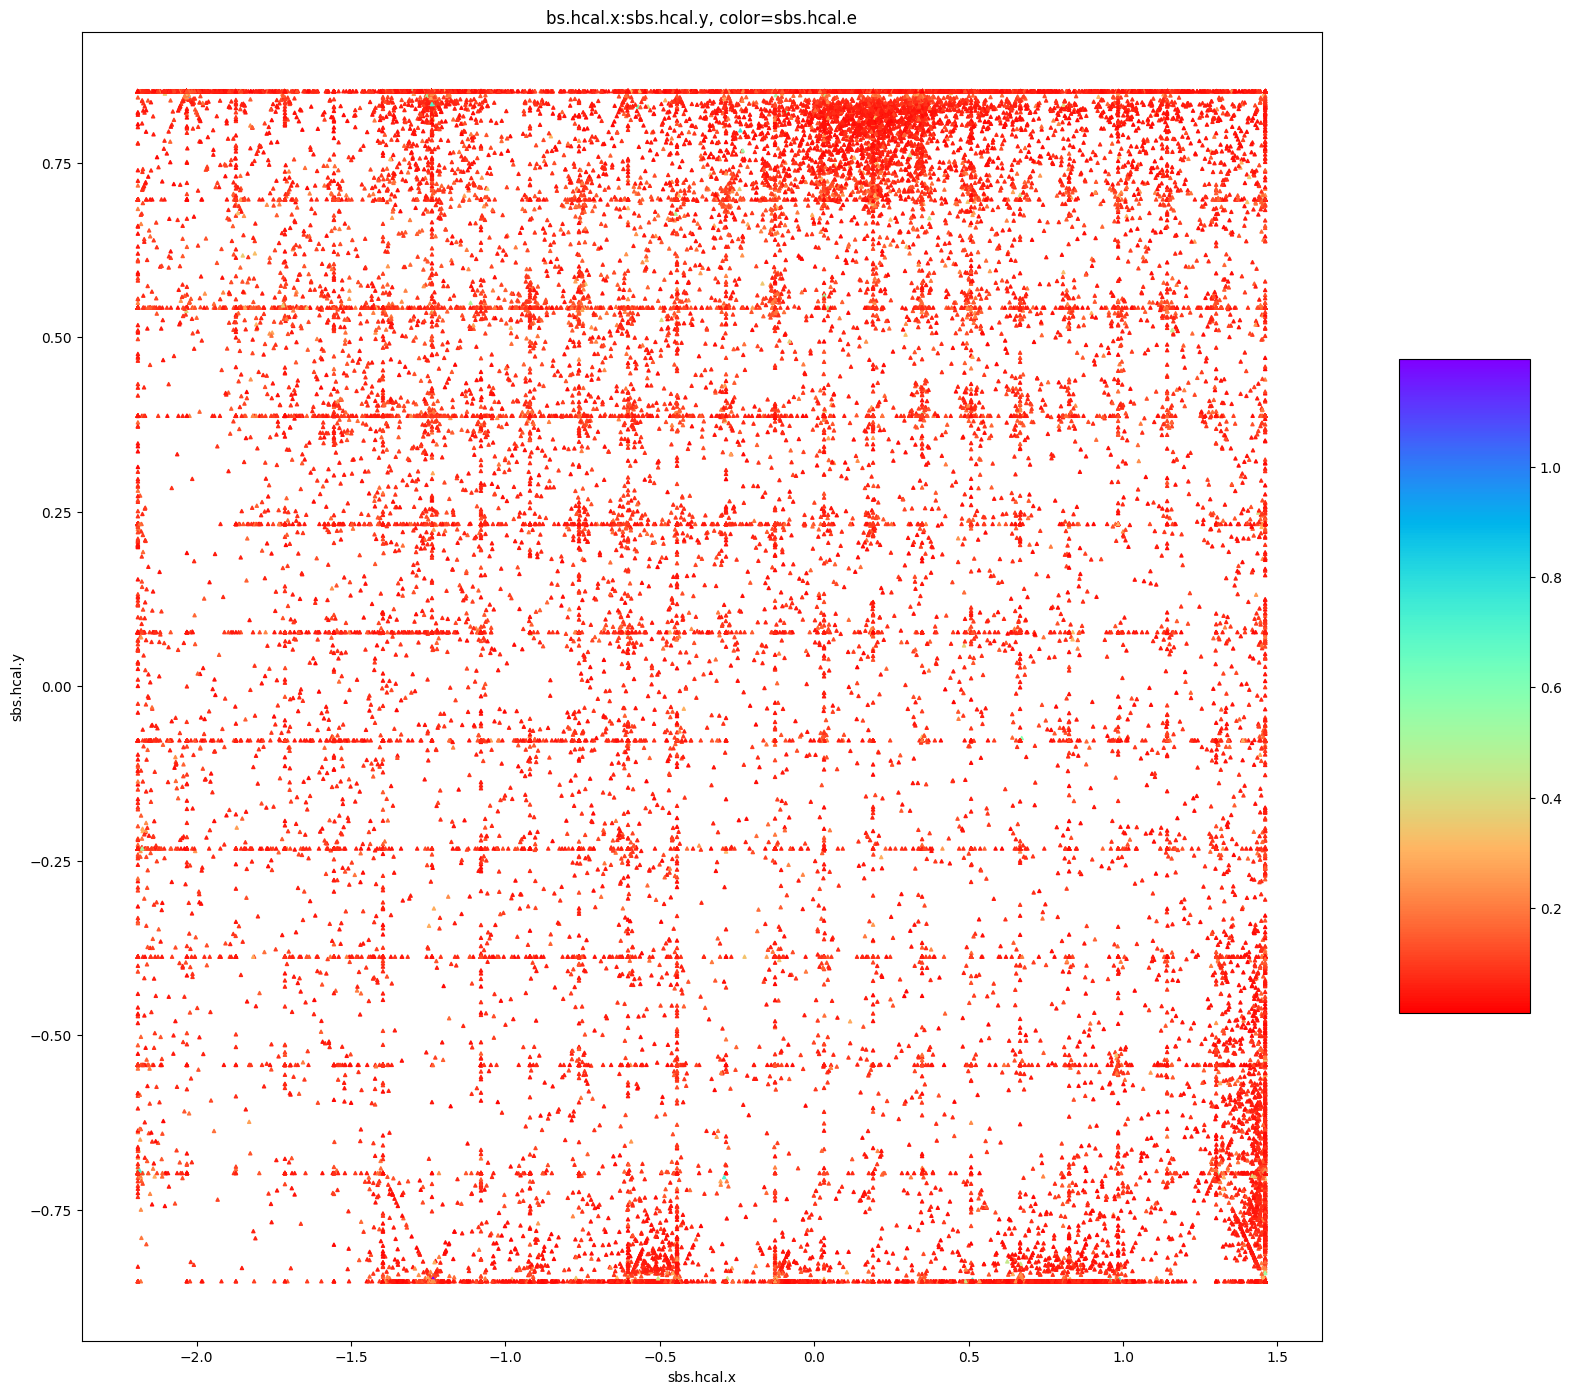

In [12]:
#Create figure
fig = plt.figure(figsize = (20, 17))
ax = plt.axes()
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')


# Creating plot
sctt = ax.scatter(x, y, c=e, s=5, cmap = my_cmap, marker ='^') #(x, y, color, size, colormap, marker)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)


plt.title("bs.hcal.x:sbs.hcal.y, color=sbs.hcal.e")
 
# show plot
plt.show()

### Cuts

To remove lower energy pions and muons produced in the shower, an energy cut may be perfomed to the data. If the right energy cut is applied, then ideally only the clusters resulting from the nucleons would remain. UPROOT has a efficient method to performing a cut by refrencing the array of data with the restriction. For example, the energy of the clusters from the HCAl can be limited to only the values greater than 0.5 GeV by using the code below. 

In [13]:
#with cuts
euncut = T["sbs.hcal.e"].array()
ecut = euncut[euncut > .5] 
e = np.array(ecut)


xuncut = T["sbs.hcal.x"].array()
xcut = xuncut[euncut > .5]
x = np.array(xcut)

yuncut = T["sbs.hcal.y"].array()
ycut = yuncut[euncut > .5]
y = np.array(ycut)

print("Note size of e array now:", np.size(e))

Note size of e array now: 53


When this cut data is now graphed, there are obviously much less points:

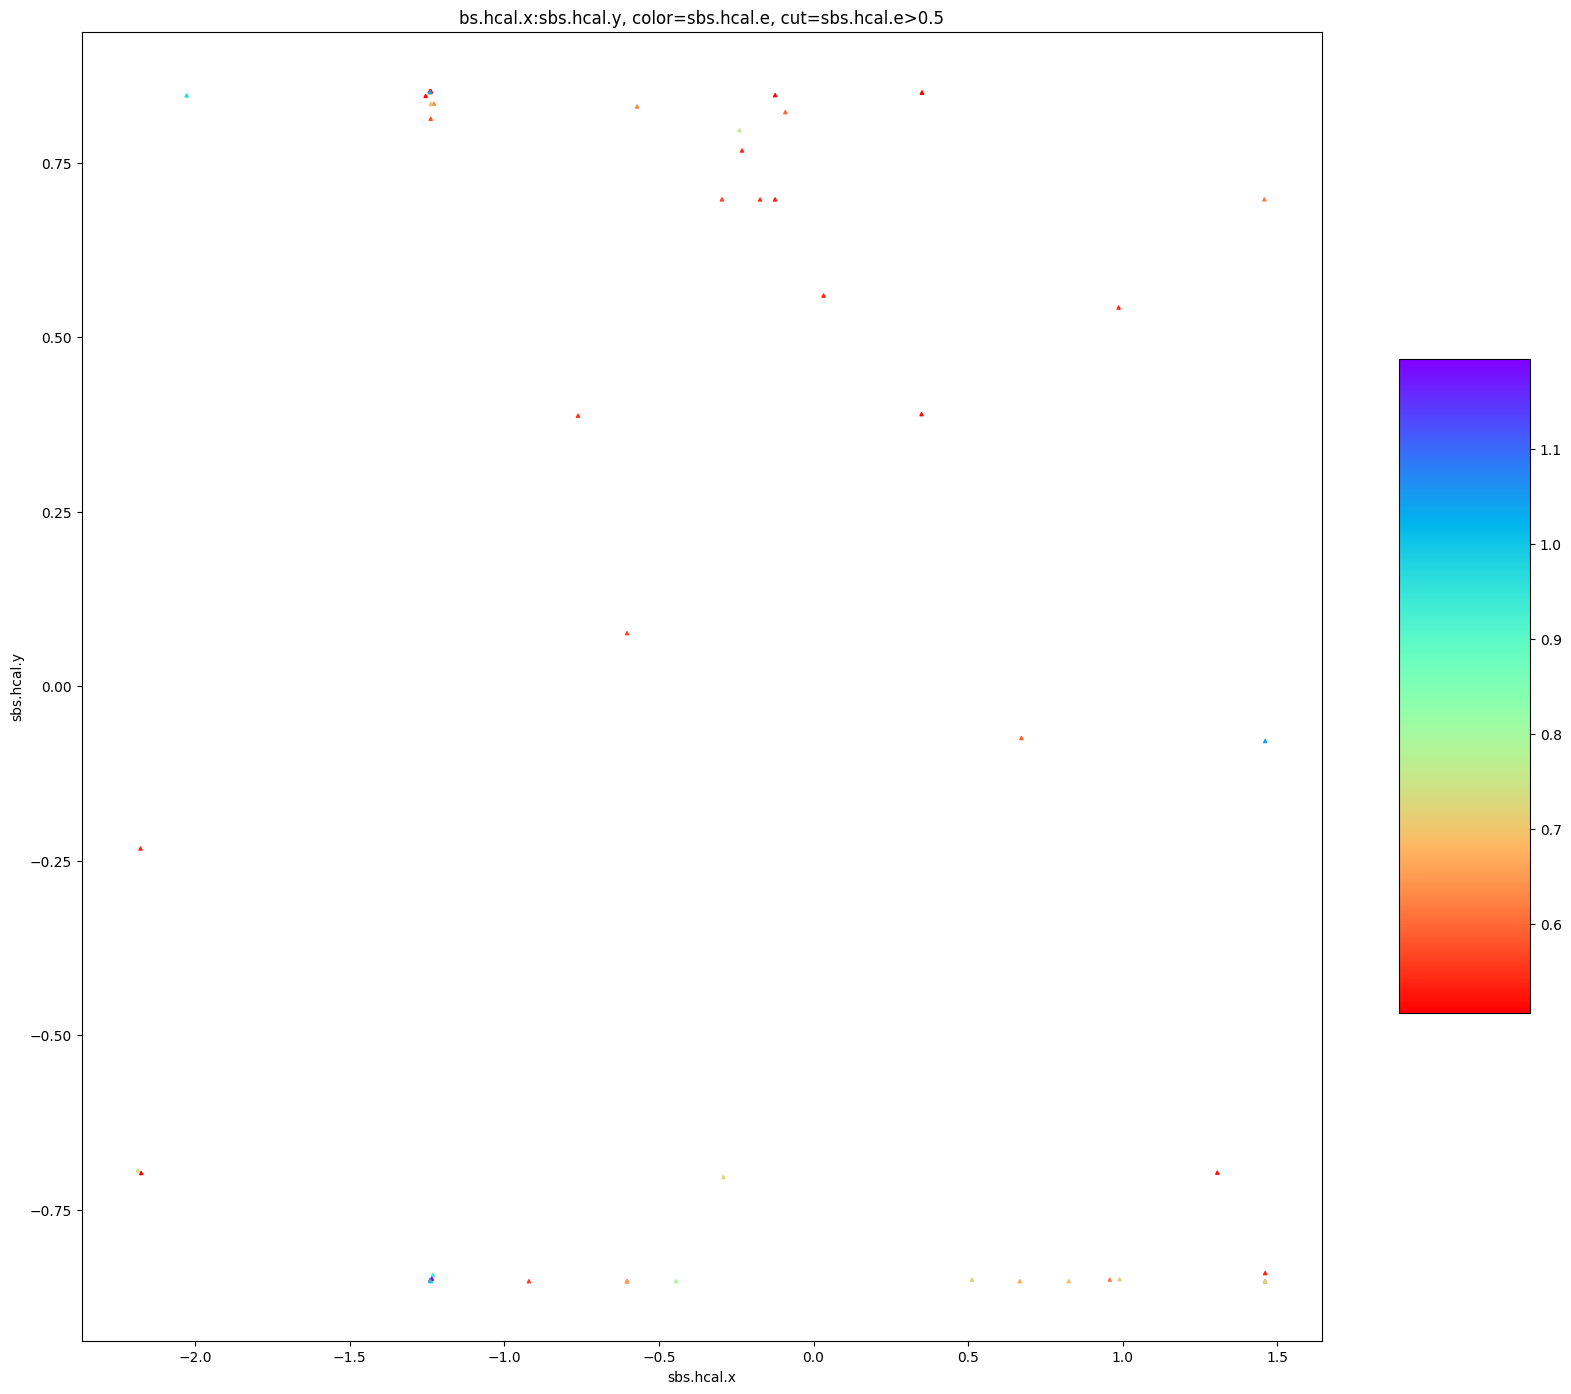

In [14]:
#Create figure
fig = plt.figure(figsize = (20, 17))
ax = plt.axes()
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')


# Creating plot
sctt = ax.scatter(x, y, c=e, s=5, cmap = my_cmap, marker ='^') #(x, y, color, size, colormap, marker)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)


plt.title("bs.hcal.x:sbs.hcal.y, color=sbs.hcal.e, cut=sbs.hcal.e>0.5")
 
# show plot
plt.show()

We can also do a position cut to only look at the protons which were deflected upwards by the magnet. To restrict the data to only positive y values, use the code below. 

Note size of e array now: 28


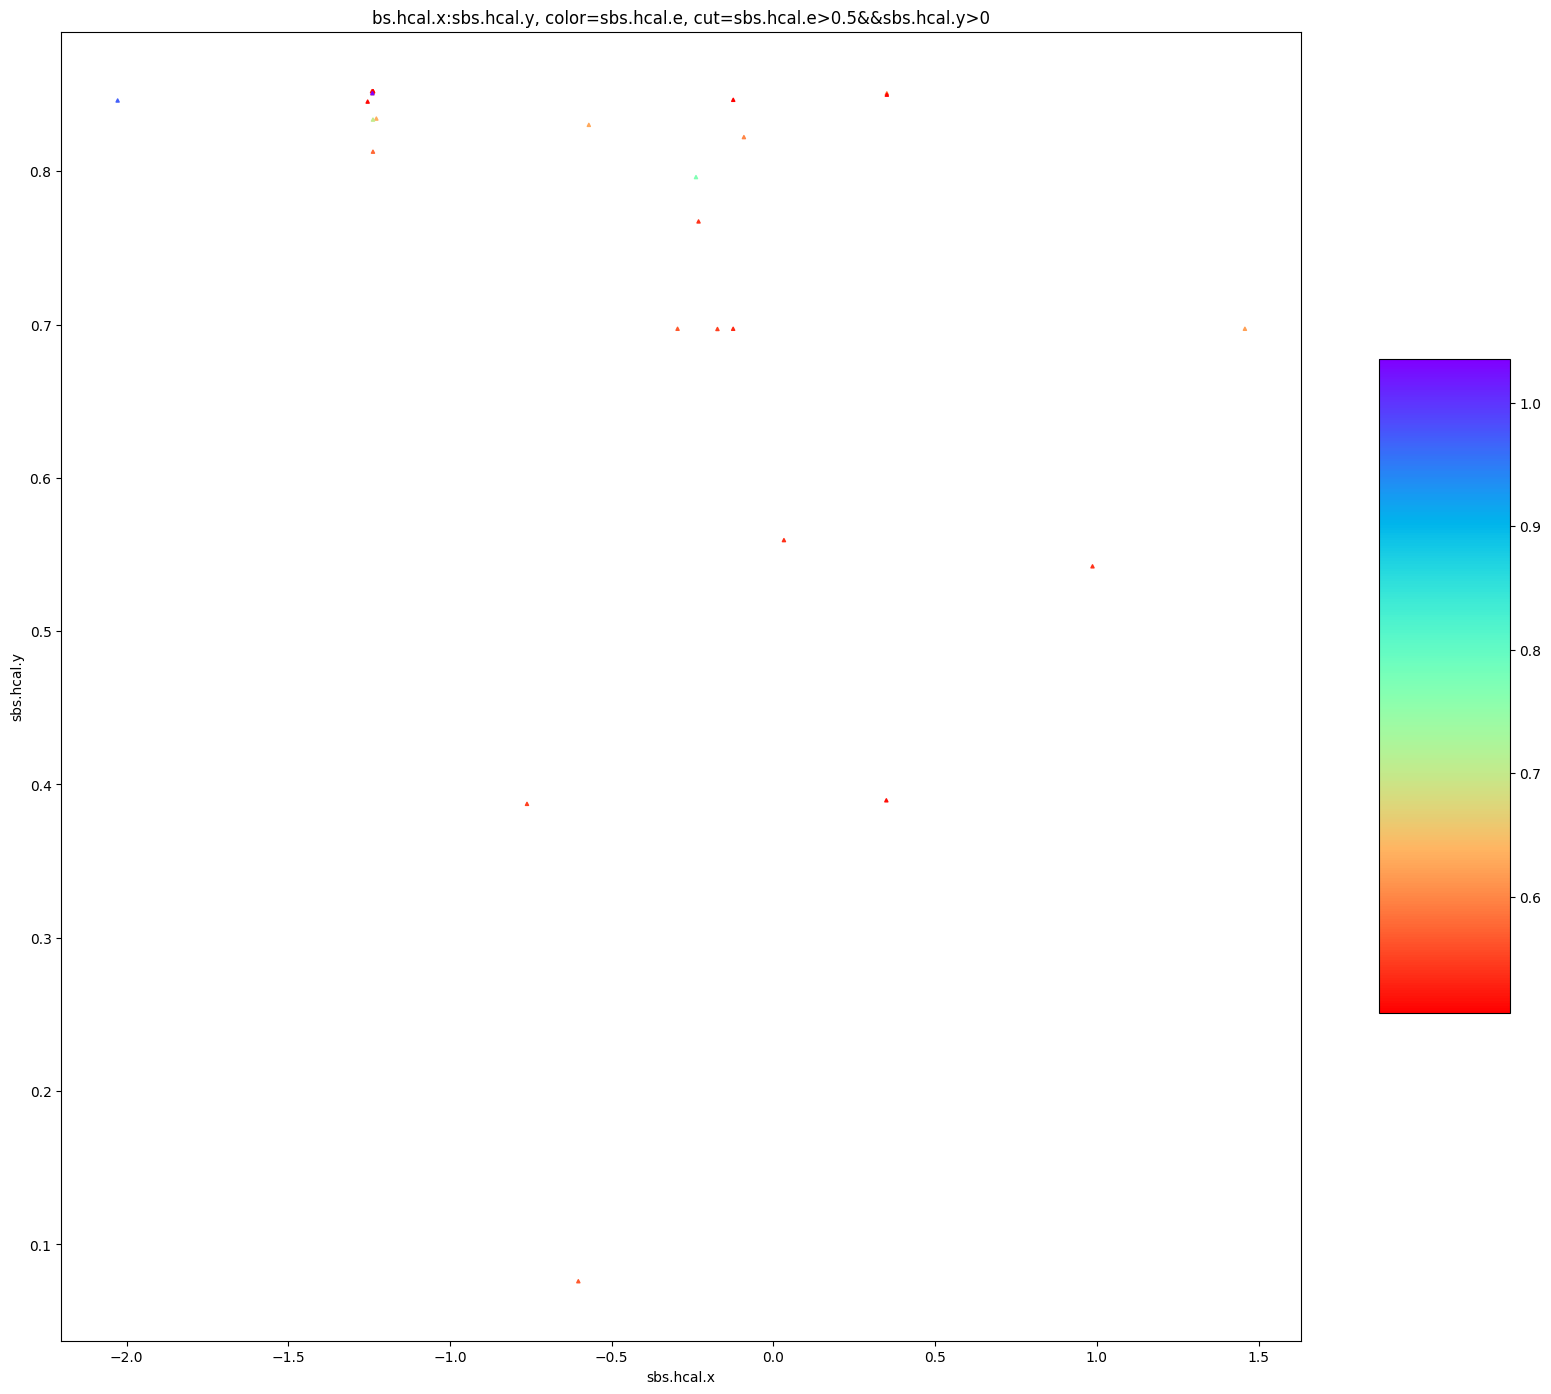

In [15]:
#with cuts
euncut = T["sbs.hcal.e"].array()
xuncut = T["sbs.hcal.x"].array()
yuncut = T["sbs.hcal.y"].array()

#cuts
ecut = euncut[(euncut > .5) & (yuncut > 0)] 
e = np.array(ecut)

xcut = xuncut[(euncut > .5) & (yuncut > 0)]
x = np.array(xcut)

ycut = yuncut[(euncut > .5) & (yuncut > 0)]
y = np.array(ycut)

print("Note size of e array now:", np.size(e))

#Create figure
fig = plt.figure(figsize = (20, 17))
ax = plt.axes()
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')


# Creating plot
sctt = ax.scatter(x, y, c=e, s=5, cmap = my_cmap, marker ='^') #(x, y, color, size, colormap, marker)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)


plt.title("bs.hcal.x:sbs.hcal.y, color=sbs.hcal.e, cut=sbs.hcal.e>0.5&&sbs.hcal.y>0")
 
# show plot
plt.show()